In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,10) #set size of Graph

In [2]:
cd E:미세먼지

E:\미세먼지


In [3]:
mise = pd.read_csv('mise.csv',encoding = 'ms949')

In [34]:
mise.head()

,Unnamed: 0,PM10,PM25,지역,측정일시,시도,연도,월,일,시간
0,0,47.0,38.0,강원 강릉시,2016010101,강원,2016,1,1,1
1,1,51.0,43.0,강원 강릉시,2016010102,강원,2016,1,1,2
2,2,52.0,44.0,강원 강릉시,2016010103,강원,2016,1,1,3
3,3,45.0,38.0,강원 강릉시,2016010104,강원,2016,1,1,4
4,4,43.0,37.0,강원 강릉시,2016010105,강원,2016,1,1,5


In [7]:
mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990691 entries, 0 to 8990690
Data columns (total 10 columns):
Unnamed: 0    int64
PM10          float64
PM25          float64
지역            object
측정일시          int64
시도            object
연도            int64
월             int64
일             int64
시간            int64
dtypes: float64(2), int64(6), object(2)
memory usage: 685.9+ MB


In [98]:
mise1 = mise[mise['시도'].values != '강원']
mise1 = mise1[mise1['시도'].values != '경기']
mise1 = mise1[mise1['시도'].values != '경남']
mise1 = mise1[mise1['시도'].values != '경북']
mise1 = mise1[mise1['시도'].values != '전북']
mise1 = mise1[mise1['시도'].values != '전남']
mise1 = mise1[mise1['시도'].values != '충남']
mise1 = mise1[mise1['시도'].values != '충북']
mise1 = mise1[mise1['시도'].values != '제주']
mise1 = mise1[mise1['시도'].values != '세종']

In [84]:
mise1.head()

,Unnamed: 0,PM10,PM25,지역,측정일시,시도,연도,월,일,시간
290472,290472,62.0,41.0,광주 광산구,2016010101,광주,2016,1,1,1
290473,290473,61.0,43.0,광주 광산구,2016010102,광주,2016,1,1,2
290474,290474,64.0,46.0,광주 광산구,2016010103,광주,2016,1,1,3
290475,290475,60.0,42.0,광주 광산구,2016010104,광주,2016,1,1,4
290476,290476,56.0,42.0,광주 광산구,2016010105,광주,2016,1,1,5


In [99]:
mise11 = mise1.groupby(['시도','시간']).mean()

In [100]:
mise11.head(3)

Unnamed: 0       PM10       PM25          측정일시           연도  \
시도 시간                                                                  
광주 1   4.327284e+06  41.071429  24.728655  2.017066e+09  2016.999088   
   2   4.327285e+06  40.201895  24.593454  2.017066e+09  2016.999088   
   3   4.327286e+06  39.454152  24.298726  2.017066e+09  2016.999088   

              월          일  
시도 시간                       
광주 1   6.521898  15.732664  
   2   6.521898  15.732664  
   3   6.521898  15.732664

In [101]:
mise11.reset_index(['시도','시간'],inplace=True)

In [88]:
mise1.head(3)

,시도,시간,Unnamed: 0,PM10,PM25,측정일시,연도,월,일
0,광주,1,4.327284e+06,41.071429,24.728655,2.017066e+09,2016.999088,6.521898,15.732664
1,광주,2,4.327285e+06,40.201895,24.593454,2.017066e+09,2016.999088,6.521898,15.732664
2,광주,3,4.327286e+06,39.454152,24.298726,2.017066e+09,2016.999088,6.521898,15.732664


In [89]:
mise1.to_csv('미세요약통계량.csv',encoding = 'ms949')

In [102]:
mise11.head()

,시도,시간,Unnamed: 0,PM10,PM25,측정일시,연도,월,일
0,광주,1,4.327284e+06,41.071429,24.728655,2.017066e+09,2016.999088,6.521898,15.732664
1,광주,2,4.327285e+06,40.201895,24.593454,2.017066e+09,2016.999088,6.521898,15.732664
2,광주,3,4.327286e+06,39.454152,24.298726,2.017066e+09,2016.999088,6.521898,15.732664
3,광주,4,4.327287e+06,38.894292,24.216172,2.017066e+09,2016.999088,6.521898,15.732664
4,광주,5,4.327288e+06,38.183747,23.941211,2.017066e+09,2016.999088,6.521898,15.732664


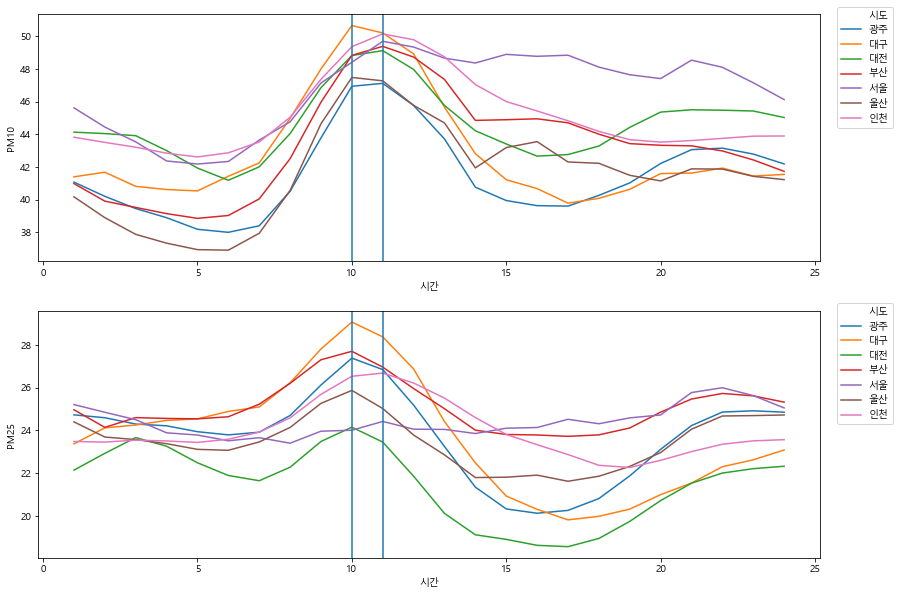

In [105]:
plt.title('미세요약통계량')
plt.subplot(2,1,1)
ax = sns.lineplot(x="시간", y="PM10",hue='시도',data=mise11)
ax.legend(bbox_to_anchor=(1.1,1.05))
plt.axvline(10)
plt.axvline(11)
plt.subplot(2,1,2)
ax = sns.lineplot(x="시간", y="PM25",hue='시도',data=mise11)
ax.legend(bbox_to_anchor=(1.1,1.05))
plt.axvline(10)
plt.axvline(11)

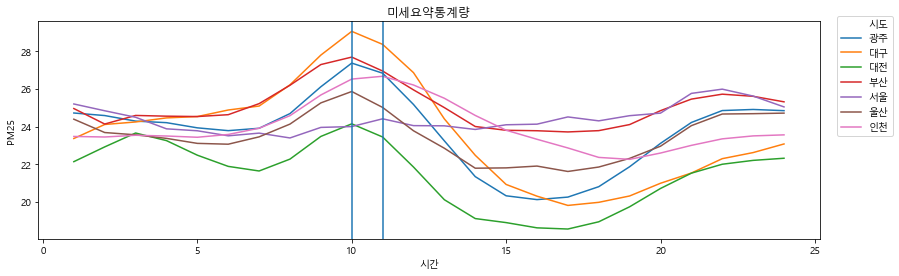

In [45]:
plt.title('미세요약통계량')
ax = sns.lineplot(x="시간", y="PM25",hue='시도',data=mise1)
ax.legend(bbox_to_anchor=(1.1,1.05))
plt.axvline(10)
plt.axvline(11)

In [115]:
mise2=mise1

In [111]:
mise2.head()

,Unnamed: 0,PM10,PM25,지역,측정일시,시도,연도,월,일,시간
290472,290472,62.0,41.0,광주 광산구,2016010101,광주,2016,1,1,1
290473,290473,61.0,43.0,광주 광산구,2016010102,광주,2016,1,1,2
290474,290474,64.0,46.0,광주 광산구,2016010103,광주,2016,1,1,3
290475,290475,60.0,42.0,광주 광산구,2016010104,광주,2016,1,1,4
290476,290476,56.0,42.0,광주 광산구,2016010105,광주,2016,1,1,5


In [117]:
mise2 = mise2.groupby(['시도','연도','시간']).mean()

In [118]:
mise2.head()

Unnamed: 0       PM10       PM25          측정일시         월  \
시도 연도   시간                                                               
광주 2016 1   1.357489e+06  40.723294  24.318236  2.016067e+09  6.513661   
        2   1.357490e+06  39.661157  24.259843  2.016067e+09  6.513661   
        3   1.357491e+06  38.909703  23.687008  2.016067e+09  6.513661   
        4   1.357492e+06  38.800674  23.717323  2.016067e+09  6.513661   
        5   1.357493e+06  38.741501  23.612446  2.016067e+09  6.513661   

                    일  
시도 연도   시간             
광주 2016 1   15.756831  
        2   15.756831  
        3   15.756831  
        4   15.756831  
        5   15.756831

In [119]:
mise2.reset_index(['시도','연도','시간'],inplace=True)

In [120]:
mise2.head()

,시도,연도,시간,Unnamed: 0,PM10,PM25,측정일시,월,일
0,광주,2016,1,1.357489e+06,40.723294,24.318236,2.016067e+09,6.513661,15.756831
1,광주,2016,2,1.357490e+06,39.661157,24.259843,2.016067e+09,6.513661,15.756831
2,광주,2016,3,1.357491e+06,38.909703,23.687008,2.016067e+09,6.513661,15.756831
3,광주,2016,4,1.357492e+06,38.800674,23.717323,2.016067e+09,6.513661,15.756831
4,광주,2016,5,1.357493e+06,38.741501,23.612446,2.016067e+09,6.513661,15.756831


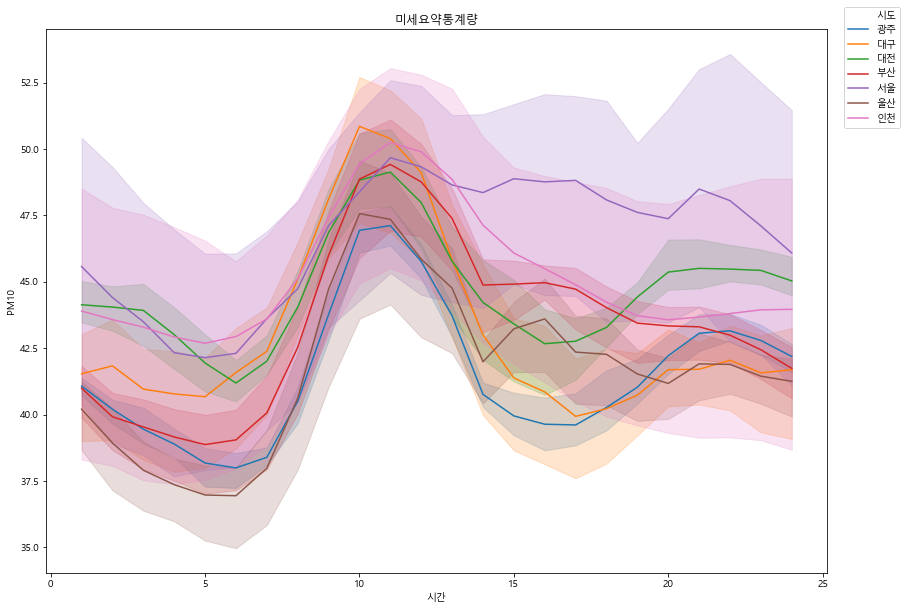

In [122]:
plt.title('미세요약통계량')
ax = sns.lineplot(x="시간", y="PM10",hue='시도',data=mise2)
ax.legend(bbox_to_anchor=(1.1,1.05))
#plt.axvline(10)
#plt.axvline(11)